### INITIALIZE AND LOAD STUFF

In [82]:
# import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')
import math
import time
from sklearn.metrics import mean_squared_error


In [1]:
movieRatingFile = "movie_rating.txt"

In [2]:
with open(movieRatingFile) as f:
    movieRatingContent = f.readlines()

In [3]:
len(movieRatingContent)

348547

In [4]:
for i in range(0,3):
    print(movieRatingContent[i])

Bamma Maata Bangaru Baata (1990)		7.5

The 61st Annual Golden Globe Awards (2004)		5.1

Con la m�sica a otra parte (1975)		3.4



In [5]:
(movieRatingContent[2].split("\t\t")[0])

'Con la m\xfasica a otra parte (1975)'

In [6]:
movieRatingMap2 = dict()
for i in range(0,len(movieRatingContent)):
    mList = movieRatingContent[i].split("\t\t")
    movieRatingMap2[str(mList[0]).strip()] = float(mList[1])

In [7]:
print(len(movieRatingMap2))
# print(movieRatingMap2)

348545


In [449]:
# movieMap = dict()
# with open('movieMap_v.csv') as csvfile:
#     reader = csv.DictReader(csvfile)

#     for row in reader:
#         movieMap[str(row['Movie'])] = int(row['ID'])

In [451]:
# actorMap = dict()
# with open('actorMap_v2.csv') as csvfile:
#     reader = csv.DictReader(csvfile)

#     for row in reader:
#         actorMap[str(row['Actor'])] = int(row['ID'])
# nActors = len(actorMap)

In [8]:
import pickle 
movieActors = pickle.load( open( "movieActors_v10.pickle", "rb" ) )

In [9]:
actorMovies = pickle.load( open( "actorMovies_v10.pickle", "rb" ) )

In [10]:
actorMap = pickle.load( open( "actorMap_v10.pickle", "rb" ) )

In [11]:
movieMap = pickle.load( open( "movieMap_v10.pickle", "rb" ) )

In [12]:
genreMap = pickle.load( open( "genreMap_v10.pickle", "rb" ) )

In [13]:
genreList = list(set(genreMap.values()))
print(len(genreList))
print(genreList)

29
[u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Comedy', u'War', u'Horror', u'Film-Noir', u'Adventure', u'News', u'Erotica', u'Western', u'Thriller', u'Adult', u'Mystery', u'Short', u'Talk-Show', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Reality-TV', u'Fantasy', u'Game-Show', u'Sport', u'Biography']


In [168]:
genreList.index("abcd")

ValueError: 'abcd' is not in list

In [14]:
movieIDMap = dict()

for movie in movieMap:
    movieIDMap[int(movieMap[movie])] = movie

In [15]:
actorIDMap = dict()
nActors = len(actorMap)
for actor in actorMap:
    actorIDMap[int(actorMap[actor])] = actor

In [16]:
print(len(actorMap))
print(len(actorIDMap))

113110
113110


In [15]:
i=0
for k in actorIDMap:
    if(i==10):
        break
    print(k)
    i+=1
    

1
2
3
4
5
6
7
8
9
10


In [16]:
i=0
for k in actorMovies:
    if(i==10):
        break
    print(actorMovies[k])
    i+=1
    

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
set([32, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
set([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71])
set([72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])
set([91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124])
set([128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 125, 126, 127])
set([138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151])
set([160, 161, 162, 163, 164, 165, 152, 153, 154, 155, 156, 157, 158, 159])
set([166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189])
set([190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,

### ACTUAL CODE

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

def getModel(modelName, arg=None):
    model = None
    if modelName == 'LinearRegression':
        model = LinearRegression()
               
    if modelName == 'RandomForestRegressor':
        model = RandomForestRegressor(n_estimators=arg[0], max_depth=arg[1], max_features=arg[2], oob_score=True, random_state=0)
    
    if modelName == 'MLPRegressor':
        model = MLPRegressor(activation=arg[0], solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(arg[1],), random_state=1)
        
    if modelName == 'KNeighborsRegressor':
        model = KNeighborsRegressor(n_neighbors=arg[0])
        
        
    return model

In [78]:
import re
movieYearRegex = '([0-9]{4})'
#movieCleaningRE_string = '.*\\((([0-9]{4}(\\/[aA-zZ]*){0,1})|(\\?+))\\)'
movieYearRegexObj = re.compile(movieYearRegex)

In [79]:
print(movieYearRegexObj.search("Zoom, Zoom, (23)perman! (1993)").group(0))

1993


In [80]:
from sklearn.preprocessing import StandardScaler

def extract_features_labels(movieRatingMap):
    X = list()
    Y = list()
    Z = list()
    for mId in movieRatingMap.iterkeys():
        featureVector = list()
        
        mName = str(movieRatingMap[mId][MNAME])
        
#         nameLength = len(movieRatingMap[mId][MNAME])
#         featureVector.extend([nameLength])
        
        mYear = movieYearRegexObj.search(mName)
        if mYear is None:
            featureVector.extend([0])
        else:
            featureVector.extend([int(mYear.group(0))])
            
        
        actorFeat = [0]*nActors
        mActors = movieActors[int(mId)]
        for idx in mActors:
            actorFeat[idx] = 1
        mNumberActors = len(mActors)
        
        featureVector.extend([mNumberActors])
        featureVector.extend(actorFeat)
        
        if mName in genreMap:
            mGenreId = genreList.index(genreMap[mName])
        else:
            mGenreId = -1
        featureVector.extend([mGenreId])
                
        X.append(featureVector)
        Y.append(movieRatingMap[mId][MRATING])
        Z.append(mId)
    
    scaler = StandardScaler()
    Xnew = scaler.fit_transform(X)
    
    return Xnew, Y, Z

In [17]:
testMovieRatingMap = dict()
MNAME = "movieName"
MRATING = "movieRating"
# movieMapNameList = movieMap.keys()
testMovies = [\
              ["Batman v Superman: Dawn of Justice (2016)", 6.6],\
              ["Mission: Impossible - Rogue Nation (2015)", 7.4],\
              ["Minions (2015)", 6.4]\
             ]
for i in range(0, 3):
    mList = testMovies[i]
    movieName = str(mList[0])
    if movieName in movieMap:
        movieId = movieMap[movieName]
        testMovieRatingMap[movieId] = dict()
        testMovieRatingMap[movieId][MNAME] = movieName
        movieRating = float(mList[1])
        testMovieRatingMap[movieId][MRATING] = movieRating
print(testMovieRatingMap)  

{48394: {'movieRating': 7.4, 'movieName': 'Mission: Impossible - Rogue Nation (2015)'}, 12651: {'movieRating': 6.6, 'movieName': 'Batman v Superman: Dawn of Justice (2016)'}, 100844: {'movieRating': 6.4, 'movieName': 'Minions (2015)'}}


In [176]:
import time
startTime = time.time()
movieRatingMap = dict()
MNAME = "movieName"
MRATING = "movieRating"
mcount = 0
# movieMapNameList = movieMap.keys()
smallmovieList = {k: movieRatingMap2[k] for k in sorted(movieRatingMap2.keys())[:20000]}
# TODO: REMOVE TARGET MOVIE NAMES FROM THIS ABOVE LIST
for mName in smallmovieList:
#     mList = movieRatingContent[i].split("\t\t")
    movieName = str(mName)
    if movieName in movieMap:
        movieId = movieMap[movieName]
        movieRatingMap[movieId] = dict()
        movieRatingMap[movieId][MNAME] = movieName
        movieRating = float(smallmovieList[mName])
        movieRatingMap[movieId][MRATING] = movieRating

        mcount+=1

endTime = time.time()
print(endTime-startTime)

/Users/rahul/virtualenvs/titleanalysis/lib/python2.7/site-packages/ipykernel_launcher.py:13: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  del sys.path[0]


0.876392126083


In [177]:
with open("movieRatingMap.pickle", 'wb') as pickle_file:
    pickle.dump(movieRatingMap, pickle_file, protocol=2)

In [178]:
print(len(smallmovieList), len(movieRatingMap))

(20000, 10409)


In [18]:
movieRatingMap = pickle.load( open( "movieRatingMap.pickle", "rb" ) )

In [19]:
print(len(movieRatingMap))

10409


In [20]:
# trainMovieRatingMap = {k: movieRatingMap[k] for k in sorted(movieRatingMap.keys())}
trainMovieRatingMap = movieRatingMap

In [21]:
print(len(trainMovieRatingMap))

10409


In [37]:
X, Y, Z = extract_features_labels(trainMovieRatingMap)

In [38]:
print(len(X),len(X[0]))

(10409, 113113)


In [39]:
import numpy as np
from sklearn.decomposition import PCA
startTime = time.time()

pca = PCA(n_components=200)
Xpca = pca.fit_transform(X)
# print(pca.explained_variance_ratio_)  
endTime = time.time()
print(endTime-startTime)

555.141471863


In [40]:
XTest, YTest, ZTest = extract_features_labels(testMovieRatingMap)
XTest = pca.transform(XTest)

In [41]:
print(len(Xpca),len(Xpca[0]))

(10409, 200)


In [42]:
with open("Xpca.pickle", 'wb') as pickle_file:
    pickle.dump(Xpca, pickle_file, protocol=2)
with open("Y.pickle", 'wb') as pickle_file:
    pickle.dump(Y, pickle_file, protocol=2)
with open("Z.pickle", 'wb') as pickle_file:
    pickle.dump(Z, pickle_file, protocol=2)
    
with open("XTest.pickle", 'wb') as pickle_file:
    pickle.dump(XTest, pickle_file, protocol=2)
with open("YTest.pickle", 'wb') as pickle_file:
    pickle.dump(YTest, pickle_file, protocol=2)
with open("ZTest.pickle", 'wb') as pickle_file:
    pickle.dump(ZTest, pickle_file, protocol=2)
    
with open("pca.pickle", 'wb') as pickle_file:
    pickle.dump(pca, pickle_file, protocol=2)
    


In [73]:
Xpca = pickle.load( open( "Xpca.pickle", "rb" ) )
Y = pickle.load( open( "Y.pickle", "rb" ) )
Z = pickle.load( open( "Z.pickle", "rb" ) )

XTest = pickle.load( open( "XTest.pickle", "rb" ) )
YTest = pickle.load( open( "YTest.pickle", "rb" ) )
ZTest = pickle.load( open( "ZTest.pickle", "rb" ) )

pca = pickle.load( open( "pca.pickle", "rb" ) )


In [74]:
print(len(Xpca),len(Xpca[0]))

(10409, 200)


In [83]:
startTime = time.time()
modelName = "LinearRegression"
arg = []

XTrain = Xpca
YTrain = Y

lrModel = getModel(modelName, arg)
lrModel.fit(XTrain, YTrain)
prediction = lrModel.predict(XTrain)

trainMse = math.sqrt(mean_squared_error(YTrain, prediction))
endTime = time.time()

print(trainMse)
print(endTime-startTime)

1.32280578063
0.192425012589


/Users/rahul/virtualenvs/titleanalysis/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [84]:
testPrediction = lrModel.predict(XTest)
testMSE = math.sqrt(mean_squared_error(YTest, testPrediction))
print(ZTest)
print(testPrediction)
print(testMSE)

[48394, 12651, 100844]
[ 6.16254497  6.15912356  6.15953043]
0.771036663178


In [101]:
startTime = time.time()
modelName = "KNeighborsRegressor"
argList = [5, 10, 15, 20, 50, 75, 100]
# argList = [5,100]
XTrain = Xpca
YTrain = Y
bestKnrModel = None
bestRMSE = float('inf')
bestVal = -1

trainRMSEList1 = list()
testRMSEList1 = list()

for val in argList:
    arg = [val]
    print("\nArg: ",arg)
    knrModel = getModel(modelName, arg)
    knrModel.fit(XTrain, YTrain)
    prediction = knrModel.predict(XTrain)

    trainMse = math.sqrt(mean_squared_error(YTrain, prediction))
    endTime = time.time()
    
    if trainMse < bestRMSE:
        bestRMSE = trainMse
        bestKnrModel = knrModel
        bestVal = val
    
    print("\tTRAINING")
    print(trainMse)
    print(endTime-startTime)
    
    testPrediction = knrModel.predict(XTest)
    testMSE = math.sqrt(mean_squared_error(YTest, testPrediction))
    print("\tTESTING")
    print(testPrediction)
    print(testMSE)
    
    trainRMSEList1.append(trainMse)
    testRMSEList1.append(testMSE)
    
#     if testMSE < bestRMSE:
#         bestRMSE = testMSE
#         bestKnrModel = knrModel
#         bestVal = val
        
print("\nBest RMSE: ",bestRMSE)
print("\nBest Val: ",bestVal)

('\nArg: ', [5])
	TRAINING
1.12330689837
25.5399091244
	TESTING
[ 5.74  4.6   5.58]
1.57353106102
('\nArg: ', [10])
	TRAINING
1.19553390423
54.0334119797
	TESTING
[ 6.21  5.72  5.69]
0.947734139936
('\nArg: ', [15])
	TRAINING
1.22224813387
84.4872601032
	TESTING
[ 6.32        5.84666667  6.14      ]
0.774921740374
('\nArg: ', [20])
	TRAINING
1.23575427089
114.812529087
	TESTING
[ 6.205  6.005  6.375]
0.770859909452
('\nArg: ', [50])
	TRAINING
1.2643356502
149.315263987
	TESTING
[ 6.326  6.096  6.678]
0.703509298683
('\nArg: ', [75])
	TRAINING
1.27463271788
184.49724412
	TESTING
[ 6.35333333  6.284       6.49733333]
0.633729934301
('\nArg: ', [100])
	TRAINING
1.28245401752
220.642864943
	TESTING
[ 6.268  6.173  6.446]
0.69901573659
('\nBest RMSE: ', 1.1233068983735117)
('\nBest Val: ', 5)


In [102]:
testPrediction = bestKnrModel.predict(XTest)
testMSE = math.sqrt(mean_squared_error(YTest, testPrediction))
print(ZTest)
print(testPrediction)
print(testMSE)

[48394, 12651, 100844]
[ 5.74  4.6   5.58]
1.57353106102


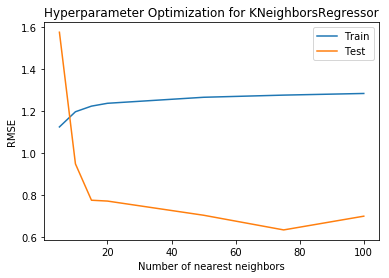

In [103]:
import matplotlib.pyplot as plt

plt.plot(argList, trainRMSEList1, label="Train")
plt.plot(argList, testRMSEList1, label="Test")
plt.legend()
plt.xlabel("Number of nearest neighbors")
plt.ylabel("RMSE")
plt.title("Hyperparameter Optimization for KNeighborsRegressor")
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error
import time
startTime = time.time()
modelName = "RandomForestRegressor"
argList = [5, 10, 15, 20, 50, 75, 100]
# argList = [5,100]
XTrain = Xpca
YTrain = Y

bestRfrModel = None
bestRMSE = float('inf')
bestVal = -1

trainRMSEList = list()
testRMSEList = list()

for val in argList:
    arg = [val, None, "auto"]
    print("\nArg: ",arg)

    rfrModel = getModel(modelName, arg)
    rfrModel.fit(XTrain, YTrain)
    prediction = rfrModel.predict(XTrain)

    trainMse = math.sqrt(mean_squared_error(YTrain, prediction))
    endTime = time.time()

    if trainMse < bestRMSE:
        bestRMSE = trainMse
        bestRfrModel = rfrModel
        bestVal = val
    
    print("\tTRAINING")
    print(trainMse)
    print(endTime-startTime)
    
    testPrediction = rfrModel.predict(XTest)
    testMSE = math.sqrt(mean_squared_error(YTest, testPrediction))
    
    print("\tTESTING")
    print(testPrediction)
    print(testMSE)
    
    trainRMSEList.append(trainMse)
    testRMSEList.append(testMSE)
    
#     if testMSE < bestRMSE:
#         bestRMSE = testMSE
#         bestRfrModel = rfrModel
#         bestVal = val
        
print("\nBest RMSE: ",bestRMSE)
print("\nBest Val: ",bestVal)

('\nArg: ', [5, None, 'auto'])


/Users/rahul/virtualenvs/titleanalysis/lib/python2.7/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


	TRAINING
0.672821133202
6.42663311958
	TESTING
[ 7.14  6.54  5.56]
0.50885492366
('\nArg: ', [10, None, 'auto'])
	TRAINING
0.598570971246
18.8487100601
	TESTING
[ 6.44  6.63  5.43]
0.788120126208
('\nArg: ', [15, None, 'auto'])
	TRAINING
0.569408262656
36.9601509571
	TESTING
[ 6.76        6.69333333  5.95333333]
0.453806942147
('\nArg: ', [20, None, 'auto'])
	TRAINING
0.554473941659
60.9782209396
	TESTING
[ 6.88  6.54  5.88]
0.425989045243
('\nArg: ', [50, None, 'auto'])
	TRAINING
0.529756915948
122.102437973
	TESTING
[ 6.23        6.46866667  6.15      ]
0.694897700971
('\nArg: ', [75, None, 'auto'])
	TRAINING
0.524097617924
213.879512072
	TESTING
[ 6.32952381  6.50777778  5.99066667]
0.663821760823
('\nArg: ', [100, None, 'auto'])
	TRAINING
0.522331322435
339.332457066
	TESTING
[ 6.22414286  6.43883333  6.002     ]
0.722730635588
('\nBest RMSE: ', 0.5223313224348062)
('\nBest Val: ', 100)


In [95]:
testPrediction = bestRfrModel.predict(XTest)
testMSE = math.sqrt(mean_squared_error(YTest, testPrediction))
print(ZTest)
print(testPrediction)
print(testMSE)

[48394, 12651, 100844]
[ 6.22414286  6.43883333  6.002     ]
0.722730635588


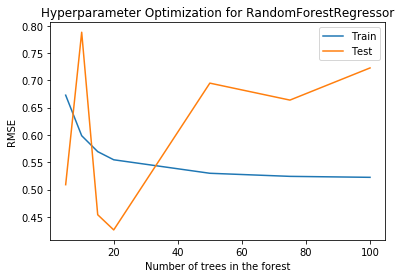

In [100]:
import matplotlib.pyplot as plt

plt.plot(argList, trainRMSEList, label="Train")
plt.plot(argList, testRMSEList, label="Test")
plt.legend()
plt.xlabel("Number of trees in the forest")
plt.ylabel("RMSE")
plt.title("Hyperparameter Optimization for RandomForestRegressor")
plt.show()

## QUESTION 13

In [22]:
# print(gMovieNodes)

In [23]:
print(actorMap["Cruise, Tom"])
print(actorIDMap[14496])
print(movieMap["Mission: Impossible - Rogue Nation (2015)"])
print(movieIDMap[48394])
for m in actorMovies[14496]:
    print(movieIDMap[m])
for a in movieActors[48394]:
    print(actorIDMap[a])



14496
Cruise, Tom
48394
Mission: Impossible - Rogue Nation (2015)
Sex, Drugs & Religion (2010)
Going Clear: Scientology and the Prison of Belief (2015)
Days of Thunder (1990)
Mission: Impossible Ghost Protocol Special Feature - Soaring in Dubai (2011)
Der Geist des Geldes (2007)
Mission: Impossible - Rogue Nation (2015)
Edge of Tomorrow (2014)
Born on the Fourth of July (1989)
Junket Whore (1998)
Mission: Impossible - Ghost Protocol (2011)
Rock of Ages (2012)
Legend (1985)
Taps (1981)
The Making of 'Born on the Fourth of July' (1989)
Magnolia (1999)
A Few Good Men (1992)
Winning: The Racing Life of Paul Newman (2015)
The Color of Money (1986)
Risky Business (1983)
The Firm (1993)
Room 237 (2012/I)
Minority Report (2002)
Jack Reacher (2012)
Lions for Lambs (2007)
Oblivion (2013/I)
Cocktail (1988)
Close Up (2012)
Stanley Kubrick: A Life in Pictures (2001)
Tropic Thunder (2008)
Losin' It (1983)
Knight and Day (2010)
Austin Powers in Goldmember (2002)
Mena (2017)
A Tribute to J.J. Abrams (

In [24]:
print(actorMap["Watson, Emma (II)"])
print(actorIDMap[111280])
print(movieMap["Harry Potter and the Prisoner of Azkaban (2004)"])
print(movieIDMap[142925])
for m in actorMovies[111280]:
    print(movieIDMap[m])
for a in movieActors[142925]:
    print(actorIDMap[a])



111280
Watson, Emma (II)
142925
Harry Potter and the Prisoner of Azkaban (2004)
This Is the End (2013)
Harry Potter and the Sorcerer's Stone (2001)
Harry Potter and the Chamber of Secrets (2002)
Harry Potter: Hogwarts Challenge (2007)
The Perks of Being a Wallflower (2012)
Noah (2014)
Beauty and the Beast (2017)
The Tale of Despereaux (2008)
Harry Potter and the Order of the Phoenix (2007)
Harry Potter and the Deathly Hallows: Part 1 (2010)
Creating the World of Harry Potter, Part 4: Sound and Music (2010)
The Bling Ring (2013)
Harry Potter and the Forbidden Journey (2010)
Lego Harry Potter: Years 1-4 (2010)
Harry Potter and the Prisoner of Azkaban (2004)
Harry Potter and the Half-Blood Prince (2009)
Struggle to the Light (2014)
Harry Potter and the Escape from Gringotts (2014)
Regression (2015)
My Week with Marilyn (2011)
Harry Potter and the Goblet of Fire (2005)
Colonia (2016)
Harry Potter and the Deathly Hallows: Part 2 (2011)
Queen of the Tearling (????)
While We're Young (????)
B

In [22]:
MACTORS = "movieActors"
# for mId in gMovieNodes:
#     gMovieNodes[mId][MACTORS] = set(movieActors[int(mId)])

testMovieActors = list()
for mId in testMovieRatingMap:
    testMovieRatingMap[mId][MACTORS] = set(movieActors[int(mId)])
    testMovieActors.extend(testMovieRatingMap[mId][MACTORS])
testMovieActors = list(set(testMovieActors))

In [23]:
MACTORS = "movieActors"

trainMovieActors = list()
for mId in trainMovieRatingMap:
    trainMovieRatingMap[mId][MACTORS] = set(movieActors[int(mId)])
    trainMovieActors.extend(trainMovieRatingMap[mId][MACTORS])
trainMovieActors = list(set(trainMovieActors))

In [24]:
testMovieActorMovies = list()
for aId in testMovieActors:
    testMovieActorMovies.extend(actorMovies[aId])
testMovieActorMovies = list(set(testMovieActorMovies))

In [25]:
trainMovieActorMovies = list()
for aId in trainMovieActors:
    trainMovieActorMovies.extend(actorMovies[aId])
trainMovieActorMovies = list(set(trainMovieActorMovies))

In [26]:
# print(testMovieActors)
print(len(testMovieActors))
# print(testMovieActorMovies)
print(len(testMovieActorMovies))
# print(max(testMovieActorMovies))

149
3155


In [27]:
# print(testMovieActors)
print(len(trainMovieActors))
# print(testMovieActorMovies)
print(len(trainMovieActorMovies))
# print(max(testMovieActorMovies))

51274
366529


In [28]:
# gMovieNodes = dict()
# for mId in testMovieActorMovies:
#     mName = movieIDMap[mId]
#     if mName in movieRatingMap2:
#         gMovieNodes[mId] = dict()
# gMovieNodes = {k: movieRatingMap[2136] for k in testMovieActorMovies}

In [29]:
testMovieActorMovieNames = list()
for mId in testMovieActorMovies:
    mName = movieIDMap[mId]
    if mName in movieRatingMap2:
        testMovieActorMovieNames.append(mName)
testMovieActorMovieNames = list(set(testMovieActorMovieNames))
print(len(testMovieActorMovieNames))
print(len(testMovieActorMovies))

2313
3155


/Users/rahul/virtualenvs/titleanalysis/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [30]:
trainMovieActorMovieNames = list()
for mId in trainMovieActorMovies:
    mName = movieIDMap[mId]
    if mName in movieRatingMap2:
        trainMovieActorMovieNames.append(mName)
trainMovieActorMovieNames = list(set(trainMovieActorMovieNames))
print(len(trainMovieActorMovieNames))
print(len(trainMovieActorMovies))

/Users/rahul/virtualenvs/titleanalysis/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


172772
366529


In [31]:
# print(movieActors[1])
# print(movieMap["Mission: Impossible Ghost Protocol Special Feature - Soaring in Dubai (2011)"])
# print(movieIDMap[211691])
# for a in movieActors[48395]:
#     print actorIDMap[a]
# # for m in actorMovies[111284]:
# #     print movieIDMap[m]

In [32]:
print(actorMovies[1])
print(len(actorMovies))

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
113110


In [33]:
gActorNodes = dict()
ARATINGS = "actorRatings"
AWEIGHT = "actorWeight" 

for aId in testMovieActors:
    if aId not in gActorNodes:
        gActorNodes[aId] = dict()
        gActorNodes[aId][ARATINGS] = list()
    for mId in actorMovies[aId]:
        mName = movieIDMap[mId]
        if mName in movieRatingMap2:
            gActorNodes[aId][ARATINGS].append(movieRatingMap2[mName])

/Users/rahul/virtualenvs/titleanalysis/lib/python2.7/site-packages/ipykernel_launcher.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # This is added back by InteractiveShellApp.init_path()


In [34]:
print(len(testMovieActors))
print(len(gActorNodes))

149
149


In [35]:
for aId in trainMovieActors:
    if aId not in gActorNodes:
        gActorNodes[aId] = dict()
        gActorNodes[aId][ARATINGS] = list()
    for mId in actorMovies[aId]:
        mName = movieIDMap[mId]
        if mName in movieRatingMap2:
            gActorNodes[aId][ARATINGS].append(movieRatingMap2[mName])

/Users/rahul/virtualenvs/titleanalysis/lib/python2.7/site-packages/ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


In [36]:
print(len(trainMovieActors))
print(len(gActorNodes))

51274
51338


In [37]:
for aId in gActorNodes:
    if(len(gActorNodes[aId][ARATINGS]) != 0 ):
        gActorNodes[aId][AWEIGHT] = sum(gActorNodes[aId][ARATINGS])/len(gActorNodes[aId][ARATINGS])
    else:
        gActorNodes[aId][AWEIGHT] = -1

In [72]:
# for aId in gActorNodes:
# topActorNodes = sorted(gActorNodes.items(), key=lambda x: x[1])
topActorNodes = dict()
for k in gActorNodes:
    topActorNodes[k] = gActorNodes[k][AWEIGHT]
    
topActorNodes = sorted(topActorNodes.items(), key=lambda (k,v): v, reverse=True)

for i in range(0,5):
    aName = actorIDMap[topActorNodes[i][0]]
    print(aName, topActorNodes[i][1])

# topActorNodes = {k:gActorNodes[k] for k in sorted(gActorNodes[k][AWEIGHT])}

(u'Castro, Katherine (IV)', 9.08)
(u'McCormick, Graeme', 8.8)
(u'Yoshimizu, Takahiro', 8.72)
(u'Khonsari, Navid', 8.672727272727274)
(u'Sudy, Trista Caruso', 8.66)


In [38]:

counter=0
for aId in gActorNodes:
#     print(aId, gActorNodes[aId][AWEIGHT])
    if gActorNodes[aId][AWEIGHT] == -1:
        counter+=1
print(counter)
        

3


In [40]:
import math
from sklearn.metrics import mean_squared_error

# rmseList = list()
yPred = list()
yAct = list()
for mId in testMovieRatingMap:
    mPredRatingList = list()
    for aId in testMovieRatingMap[mId][MACTORS]:
        if gActorNodes[aId][AWEIGHT] != -1:
            mPredRatingList.append(gActorNodes[aId][AWEIGHT])
    mPredRating = sum(mPredRatingList)/len(mPredRatingList)
    print(mId)
    yPred.append(mPredRating)
    yAct.append(testMovieRatingMap[mId][MRATING])
print(yPred)
print(yAct)

testRMSE = math.sqrt(mean_squared_error(yAct, yPred))

print(testRMSE)

    
    

48394
12651
100844
[6.499967100996352, 6.4964354505643715, 6.854869735343284]
[7.4, 6.6, 6.4]
0.585289475764


In [41]:
# rmseList = list()
yPredTrain = list()
yActTrain = list()
for mId in trainMovieRatingMap:
    mPredRatingList = list()
    for aId in trainMovieRatingMap[mId][MACTORS]:
        if gActorNodes[aId][AWEIGHT] != -1:
            mPredRatingList.append(gActorNodes[aId][AWEIGHT])
    mPredRating = sum(mPredRatingList)/len(mPredRatingList)
#     print(mId)
    yPredTrain.append(mPredRating)
    yActTrain.append(trainMovieRatingMap[mId][MRATING])
print(yPredTrain[0:10])
print(yActTrain[0:10])

trainRMSE = math.sqrt(mean_squared_error(yActTrain, yPredTrain))

print(trainRMSE)

    
    

[6.425836782390249, 7.32625, 5.32589889176256, 6.517661814171492, 6.18760833890694, 6.441776315789474, 6.093206694271911, 6.136772294643527, 6.460975609756098, 6.357297564060717]
[5.6, 8.5, 7.1, 6.2, 6.6, 6.2, 4.7, 7.6, 7.2, 7.1]
1.11726873481


### QUESTION 4-5

In [56]:
aList = ["Cruise, Tom", "Watson, Emma (II)", "Clooney, George", "Hanks, Tom",\
         "Johnson, Dwayne (I)", "Depp, Johnny", "Smith, Will (I)", "Streep, Meryl",\
         "DiCaprio, Leonardo", "Pitt, Brad",\
         "Flowers, Bess", "Tatasciore, Fred", "Harris, Sam (II)", "Blum, Steve (IX)",\
         "Miller, Harold (I)", "Jeremy, Ron", "Phelps, Lee (I)", "Lowenthal, Yuri",\
         "Downes, Robin Atkin", "O'Connor, Frank (I)"]

In [107]:
for actor in aList:
    nM = len(actorMovies[actorMap[actor]])
    print(actor, nM)

('Cruise, Tom', 63)
('Watson, Emma (II)', 25)
('Clooney, George', 67)
('Hanks, Tom', 79)
('Johnson, Dwayne (I)', 78)
('Depp, Johnny', 98)
('Smith, Will (I)', 49)
('Streep, Meryl', 97)
('DiCaprio, Leonardo', 49)
('Pitt, Brad', 71)
('Flowers, Bess', 828)
('Tatasciore, Fred', 353)
('Harris, Sam (II)', 600)
('Blum, Steve (IX)', 373)
('Miller, Harold (I)', 561)
('Jeremy, Ron', 637)
('Phelps, Lee (I)', 647)
('Lowenthal, Yuri', 317)
('Downes, Robin Atkin', 267)
("O'Connor, Frank (I)", 623)
